In [1]:
import pandas as pd
import emoji
from cleantext import clean
import advertools as adv
from googletrans import Translator
import langid
import enchant
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import ipynb.fs.full.Webscraping as ws
import ipynb.fs.full.Datapreprocess as dp
import ipynb.fs.full.ML as ml
import ipynb.fs.full.Tableau as tb

## WEB SCRAPING

In [6]:
url=input("enter the url : ")
#https://www.amazon.in/HP-DeskJet-Inkjet-Colour-Printer/product-reviews/B08D9NDZ1Y/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=
#https://www.amazon.in/HP-100-Wired-USB-Keyboard/product-reviews/B07L4VCBLM/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=
rv=ws.cnt_rv(url)
data=ws.all_pg(rv,url)
d=str(input("Do you want to download the cleaned data? y/n"))
if d=='y':
    data.to_csv("webscrape.csv")
    print('Successfully Downloaded Cleaned Data!!')
    display(data)
elif d=='n':
    display(data)
else:
    print('Please enter the correct choice: y/n')
print("DATA SCRAPED SUCCESFULLY!!")

enter the url : https://www.amazon.in/HP-100-Wired-USB-Keyboard/product-reviews/B07L4VCBLM/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=
Do you want to download the cleaned data? y/nn


,page_no,name,date,rating,title,review
0,1,ARINDAM SAHA,Reviewed in India on 19 September 2019,5.0 out of 5 stars,\nGot at ₹299\n,\nGot this awesome keyboard at at a price of ₹...
1,1,Arvind Sahai,Reviewed in India on 14 November 2019,5.0 out of 5 stars,\nBest keyboard in given price from HP.\n,\nGood built. Smooth keys. Indian rupee key is...
2,1,Snehashis,Reviewed in India on 21 April 2019,4.0 out of 5 stars,"\nGood product, same as shown in images.\n","\nProduct is good, exactly as shown in the ima..."
3,1,ShrinivasAyyar,Reviewed in India on 31 July 2020,1.0 out of 5 stars,\nDo not Buy this Keyboard. It is a SHAME it i...,\nI made the mistake of buying 2 Keyboards bel...
4,1,Arjya Majumder,Reviewed in India on 8 November 2020,4.0 out of 5 stars,\nGood for writing and coding\n,\nReview after usage of 1 week:1.Simple minima...
...,...,...,...,...,...,...
1212,123,N. K,Reviewed in India on 18 September 2020,5.0 out of 5 stars,\nGood\n,\nWorth the money\n
1211,123,I,Reviewed in India on 9 February 2020,5.0 out of 5 stars,\ngood\n,\ngood\n
1210,123,vipin kumar,Reviewed in India on 12 November 2021,5.0 out of 5 stars,\nGood\n,\nVery good\n
1218,123,NITIN RANA,Reviewed in India on 15 July 2020,5.0 out of 5 stars,\nOnly for office basic use\n,\nNot value for money\n


DATA SCRAPED SUCCESFULLY!!


## DATA PREPROCESS

In [7]:
data=dp.basic(data)

print("Treating Null Values")
print("Before handling Null values")
for i in range(len(data)):
        if len(data['review'][i])==0:
            data['review'][i]=float("nan")
print(data.isna().sum())
data=dp.null_values(data)
print("After handling Null values")
print(data.isna().sum())
print()

print("Translation of other languages to English")
o=[]
translator = Translator()
for i in range(len(data['review'])):
    a=langid.classify(data['review'][i])
    if a[0]=='ta' or a[0]=='hi':
        o.append(i)
        
if len(o)!=0:
    p=o[0]
    print("Before Translation")
    print(data['review'][p])
    print()
    data=dp.translation(data)
    print("After translation")
    print(data['review'][p])
    print()
elif len(o)==0:
    print("All reviews are in english")
print()

print("Removing Emojis")
emo=[]
for i in range(len(data['review'])):
    orig_list = [data['review'][i]]
    emoji_dict = adv.extract_emoji(orig_list)
    l=emoji_dict['emoji'][0]
    if len(l)!=0:
        emo.append(i)
        
if len(emo)!=0:
    p=emo[0]
    print("Before Removing Emojis")
    print(data['review'][p])
    print()
    for k in emo:
        data=dp.remove_emoji(data)
    print("After Removing Emojis")
    print(data['review'][p])
    print()
    
elif len(emo)==0:
    print("No emojis in dataset")
print()


print("Tokenization")
print("Before Tokenization")
print(data['review'][0])
data=dp.tokenize(data)
print("After Tokenization")
print(data['review'][0])
print()

print("Spell Checking")
print("Before Spell Check")
dict=enchant.Dict("en_US")
for w in range(len(data['review'])):
    for x in range(len(data['review'][w])):
        if len(data['review'][w][x])!=0:
            if dict.check(data['review'][w][x])==False:
                a,b=w,x
print(data['review'][a][b])
for i in range(len(data['review'])):
    for j in data['review'][i]:
        if j=="":
            data['review'][i].remove(j)
data['review']=dp.spellcheck(data['review'])
print("After Spell Check")
print(data['review'][a][b])
print()

print("Negation Handling")
print("Before Negation Handling")
data=dp.negation_handling(data)
print("After Negation Handling")
print()

print("Stemming")
for i in range(len(data['review'])):
        for j in range(len(data['review'][i])):
            if 'ing' in data['review'][i][j]:
                a,b=i,j
print("Before Stemming")
print(data['review'][a][b])
data=dp.stemming(data)
print("After Stemming")
print(data['review'][a][b])
print()

print("Spell Checking After Stemming")
print("Before Spell Check")
dict=enchant.Dict("en_US")
for i in range(len(data['review'])):
    for j in range(len(data['review'][i])):
        if len(data['review'][i][j])!=0:
            if dict.check(data['review'][i][j])==False:
                a,b=i,j
print(data['review'][a][b])
for i in range(len(data['review'])):
    for j in data['review'][i]:
        if j=="":
            data['review'][i].remove(j)
data['review']=dp.spellcheck(data['review'])
print("After Spell Check")
print(data['review'][a][b])
print()

print("Stopwords Removal")
print("Before Stopwords Removal")
print(data['review'][0])
data['review']=dp.stw(data['review'])
print("After Stopwords Removal")
print(data['review'][0])
print()

d=str(input("Do you want to download the cleaned data? y/n"))
if d=='y':
    data.to_csv("Preprocess.csv")
    print('Successfully Downloaded Cleaned Data!!')
    display(data)
elif d=='n':
    display(data)
else:
    print('Please enter the correct choice: y/n')
print("DATA CLEANED SUCCESFULLY!!")

2022-07-25 18:39:33,064 | INFO | langid.py:162 | load_model | initializing identifier


Treating Null Values
Before handling Null values
page_no    0
name       0
date       0
rating     0
title      0
review     3
dtype: int64
After handling Null values
page_no    0
name       0
date       0
rating     0
title      0
review     0
dtype: int64

Translation of other languages to English
Before Translation
बहुत बढ़िया है ।कम पैसो में अच्छा कीबोर्ड है । टिकाऊ है । hp का है तो कहना ही क्या ..!👌🏻

After translation
Very nice. Good keyboard for less money. is durable. If it is of hp then what to say..!👌🏻


Removing Emojis
Before Removing Emojis
𝐓𝐡𝐢𝐬 𝐈𝐬 𝐧𝐨𝐭 𝐦𝐞𝐚𝐧𝐭/𝐛𝐮𝐢𝐥𝐝 𝐟𝐨𝐫 𝐆𝐚𝐦𝐢𝐧𝐠 𝐏𝐮𝐫𝐩𝐨𝐬𝐞.🎮👨‍💻𝐈 𝐑𝐞𝐩𝐞𝐚𝐭...𝐍𝐨𝐭 𝐅𝐨𝐫 𝐏𝐥𝐚𝐲𝐢𝐧𝐠 𝐆𝐚𝐦𝐞𝐬 𝐨𝐧 𝐏𝐂/𝐋𝐚𝐩𝐭𝐨𝐩 💻.best wired keyboard available in the market ♥️🔥😍⌨️..you can use for school 👨‍🏫, college👨‍🎓, office 👨‍💼,classes 📓, editing 💻 🎥📽️, programming (computer/it software engineers) 👨‍💻👩‍💻⌨️🖱️ etc ...this is the multipurpose keyboard except gaming (𝙔𝙤𝙪 𝙎𝙝𝙤𝙪𝙡𝙙 𝙉𝙤𝙩 𝙐𝙨𝙚 𝙞𝙩 𝙁𝙤𝙧 𝙋𝙡𝙖𝙮𝙞𝙣𝙜 𝙋𝘾/𝙇𝙖𝙥𝙩𝙤𝙥 𝙂𝙖𝙢𝙚𝙨 𝙤𝙣 𝙩𝙝𝙞𝙨 𝙆𝙚𝙮𝙗𝙤𝙖𝙧𝙙.)for that search/buy another gaming pur

,page_no,name,date,rating,title,review
0,1,ARINDAM SAHA,19 September 2019,5.0,got at ₹299,"[awesome, keyboard, price, rs 299, keyboard, ..."
1,1,Arvind Sahai,14 November 2019,5.0,best keyboard in given price from hp.,"[good, built, smooth, keys, india n, rupee, k..."
2,1,Snehashis,21 April 2019,4.0,"good product, same as shown in images.","[product, good, exact, shown, images, surpri s..."
3,1,ShrinivasAyyar,31 July 2020,1.0,do not buy this keyboard. it is a shame it is ...,"[mistake, buy, 2, keyboards, believe, brand, h..."
4,1,Arjya Majumder,8 November 2020,4.0,good for writing and coding,"[review, usage, 1, week, 1, simple, minimalist..."
...,...,...,...,...,...,...
1212,123,N. K,18 September 2020,5.0,good,"[worth, money]"
1211,123,I,9 February 2020,5.0,good,[good]
1210,123,vipin kumar,12 November 2021,5.0,good,[good]
1218,123,NITIN RANA,15 July 2020,5.0,only for office basic use,"[value, money]"


DATA CLEANED SUCCESFULLY!!


## MACHINE LEARNING

Classifying the reviews based on sentiment scores


,page_no,name,date,rating,title,review,Sentiment_vader
0,1,ARINDAM SAHA,19 September 2019,5.0,got at ₹299,"[awesome, keyboard, price, rs 299, keyboard, ...",Positive
1,1,Arvind Sahai,14 November 2019,5.0,best keyboard in given price from hp.,"[good, built, smooth, keys, india n, rupee, k...",Positive
2,1,Snehashis,21 April 2019,4.0,"good product, same as shown in images.","[product, good, exact, shown, images, surpri s...",Positive
3,1,ShrinivasAyyar,31 July 2020,1.0,do not buy this keyboard. it is a shame it is ...,"[mistake, buy, 2, keyboards, believe, brand, h...",Negative
4,1,Arjya Majumder,8 November 2020,4.0,good for writing and coding,"[review, usage, 1, week, 1, simple, minimalist...",Positive
...,...,...,...,...,...,...,...
1212,123,N. K,18 September 2020,5.0,good,"[worth, money]",Positive
1211,123,I,9 February 2020,5.0,good,[good],Positive
1210,123,vipin kumar,12 November 2021,5.0,good,[good],Positive
1218,123,NITIN RANA,15 July 2020,5.0,only for office basic use,"[value, money]",Positive



Calculating TF-IDF score for Machine Learning


,0,0' s,00000000,08,1,10,100,11,120,13th,...,yes,yesterday,you amazon,you tube,you're,youlokanat h,yup,yurek a,zebronic s,zero
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.351725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1212,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1213,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1214,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Classification of Reviews


,Classes,No.of Reviews
0,Positive,884
1,Negative,152
2,Neutral,180


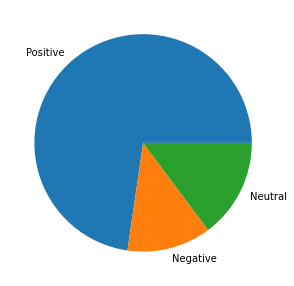


Enter the no. of testcases: 2
Enter a text to test our model : best product... i will recommend it
Enter a text to test our model : worst product..waste of moey..
No emojis in dataset

Translation of other languages to English
All reviews are in english

491
480
range(1216, 1218)
Supervised Machine learning models


,methods,accuracy
0,Random Forest,0.835526
1,Logistic Regression,0.848684



Ensemble methods - Top 5


,Ensemble method,accuracy
0,"Random forest,Logistic Regression with Ada Boo...",0.871711
1,"Logistic Regression,Bagging logistic regressio...",0.868421
2,"Random forest,Logistic Regression with Ada Boo...",0.861842
3,Random Forest and Logistic Regression,0.855263
4,Random forest and Gradient Boosting,0.855263



Prediction Result


,review,prediction
0,best product... i will recommend it,Positive
1,worst product..waste of moey..,Negative



Visualizing ML models


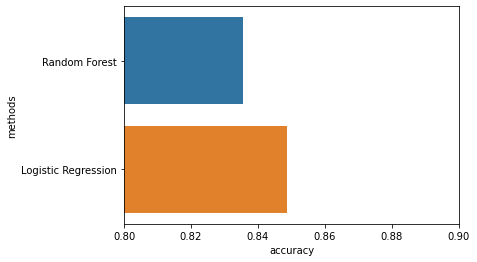


Visualizing the accuracy of models


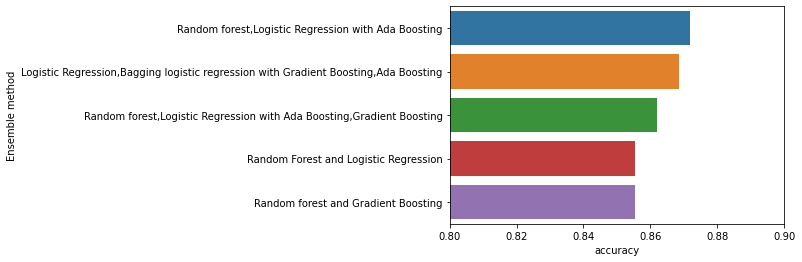

In [8]:
data=ml.datatype(data)
data=ml.sentiment_scores(data)
r=ml.tf_idf_fit(data["review"])
print("Classifying the reviews based on sentiment scores")
display(data)
print()
print("Calculating TF-IDF score for Machine Learning")
display(r)
print()
print("Classification of Reviews")
q=ml.classes(data)
display(q)
plt.figure(figsize=(5,5))
plt.pie(q['No.of Reviews'],labels=q['Classes'])
plt.show()
print()

nos=int(input("Enter the no. of testcases: "))
l1=[]
for j in range(nos):
    st=str(input("Enter a text to test our model : "))
    l1.append(st)
a=pd.DataFrame({'review':l1})
y=a.copy()
a=dp.null_values(a)
emo=[]
for i in range(len(a['review'])):
    orig_list = [a['review'][i]]
    emoji_dict = adv.extract_emoji(orig_list)
    l=emoji_dict['emoji'][0]
    if len(l)!=0:
        emo.append(i)
    else:
        print("No emojis in dataset")
        break

for k in emo:
    a=dp.remove_emoji(a)
    break
print()

print("Translation of other languages to English")
o=[]
trans=[]
translator = Translator()
for i in range(len(a['review'])):
    ab=langid.classify(a['review'][i])
    if ab[0]=='ta' or ab[0]=='hi':
        o.append(i)
    else:
        print("All reviews are in english")
        break
for k in o:
    a=dp.translation(a)
    break
print()
a=dp.tokenize(a)
a['review']=dp.spellcheck(a['review'])
a=dp.negation_handling(a)
a=dp.stemming(a)
a['review']=dp.spellcheck(a['review'])
a['review']=dp.stw(a['review'])

a=ml.tf_idf_transform(a["review"],r.copy())
newdf,sup,res=ml.evaluation_metrics(r,data,a)
y['prediction']=res
print("Supervised Machine learning models")
display(sup)
print()
print("Ensemble methods - Top 5")
display(newdf)
print()
print("Prediction Result")
display(y)
print()
    
print("Visualizing ML models")
b=sns.barplot(y='methods',x='accuracy',data=sup)
b.set(xlim=(0.8,0.9))
plt.show()
print()
print("Visualizing the accuracy of models")
c=sns.barplot(y='Ensemble method',x='accuracy',data=newdf)
c.set(xlim=(0.8,0.9))
plt.show()
print()

## EXPLORATORY DATA ANALYSIS

In [10]:
data=tb.aspect(data)
data=tb.new_asp(data)
print()
data=tb.transfer_gs(data)

press enter if u want to remove "keyboard" from the aspect list
press enter if u want to remove "keys" from the aspect lista
press enter if u want to remove "quality" from the aspect lista
press enter if u want to remove "money" from the aspect lista
press enter if u want to remove "typ" from the aspect list
press enter if u want to remove "price" from the aspect list
press enter if u want to remove "hp" from the aspect list
press enter if u want to remove "value" from the aspect lista
press enter if u want to remove "gam" from the aspect list
press enter if u want to remove "comfort" from the aspect lista
press enter if u want to remove "months" from the aspect list
press enter if u want to remove "return" from the aspect lista
press enter if u want to remove "type" from the aspect lista
press enter if u want to remove "days" from the aspect list
press enter if u want to remove "press" from the aspect lista
press enter if u want to remove "time" from the aspect list
press enter if u w